## COVID Daily casualties Analysis Table and Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 
   
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [1]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 38.7 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 44 kB/s s eta 0:00:01
     |████████████████████████████████| 12.4 MB 31.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 26.0 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.6 MB/s  eta 0:00:01


In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1059      0 --:--:-- --:--:-- --:--:--  1059
100 47329  100 47329    0     0   150k      0 --:--:-- --:--:-- --:--:--  150k


In [13]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [14]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
Country/Region,,,,,,,,,,,,,
Algeria,17,17,19,21,25,26,29,31,35,44,58,86,105
Austria,16,21,28,30,49,58,68,86,108,128,146,158,168
Belgium,75,88,122,178,220,289,353,431,513,705,828,1011,1143
Brazil,25,34,46,59,77,92,111,136,159,201,240,324,359
China,3153,3153,3160,3163,3169,3174,3177,3182,3186,3187,3193,3199,3203
Denmark,13,24,32,34,41,52,65,72,77,90,104,123,139
Ecuador,14,18,27,28,34,36,48,58,60,75,93,120,145
France,674,860,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387,6507
Germany,94,123,157,206,267,342,433,533,645,775,920,1107,1275


In [5]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [6]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(9)
display(df9) 

,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
Country/Region,,,,,,,,,,,,
US,140,149,236,267,372,445,441,511,895,884,1169,1161
France,186,240,231,365,299,319,292,418,499,509,1355,1120
Spain,539,497,839,718,773,844,821,913,748,923,961,850
Italy,601,743,683,712,919,889,756,812,837,727,760,766
United Kingdom,54,87,43,113,181,260,209,180,381,563,569,684
Germany,29,34,49,61,75,91,100,112,130,145,187,168
Netherlands,34,63,80,78,112,93,132,93,175,134,166,148
Iran,127,122,143,157,144,139,123,117,141,138,124,134
Belgium,13,34,56,42,69,64,78,82,192,123,183,132


In [7]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
140,149,236,267,372,445,441,511,895,884,1169,1161"
data-datasets="186,240,231,365,299,319,292,418,499,509,1355,1120"
data-datasets="539,497,839,718,773,844,821,913,748,923,961,850"
data-datasets="601,743,683,712,919,889,756,812,837,727,760,766"
data-datasets="54,87,43,113,181,260,209,180,381,563,569,684"
data-datasets="29,34,49,61,75,91,100,112,130,145,187,168"
data-datasets="34,63,80,78,112,93,132,93,175,134,166,148"
data-datasets="127,122,143,157,144,139,123,117,141,138,124,134"
data-datasets="13,34,56,42,69,64,78,82,192,123,183,132


In [8]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Algeria,Austria,Belgium,Brazil,Canada,Canada,China,Denmark,Dominican Republic,Ecuador,...,Philippines,Poland,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/23/20,0,5,13,9,1,0,0,11,0,4,...,8,1,9,4,539,4,22,7,54,140
3/24/20,2,7,34,12,1,0,7,8,3,9,...,2,2,10,4,497,11,2,7,87,149
3/25/20,2,2,56,13,1,2,3,2,4,1,...,3,4,10,6,839,26,31,15,43,236
3/26/20,4,19,42,18,5,2,6,7,0,6,...,7,2,17,6,718,15,38,16,113,267
3/27/20,1,9,69,15,5,10,5,11,10,2,...,9,0,16,3,773,28,40,17,181,372
3/28/20,3,10,64,19,0,4,3,13,8,12,...,14,2,24,11,844,0,33,16,260,445
3/29/20,2,18,78,25,3,0,5,7,11,10,...,3,4,19,6,821,5,36,23,209,441
3/30/20,4,22,82,23,10,0,4,5,3,2,...,7,9,21,22,913,36,59,37,180,511
3/31/20,9,20,192,42,2,9,1,13,9,15,...,10,2,20,17,748,34,74,46,381,895
4/1/20,14,18,123,39,4,2,6,14,6,18,...,8,10,27,10,923,59,55,63,563,884


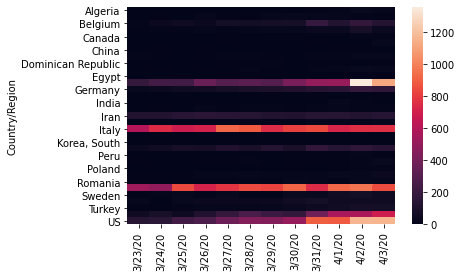

In [9]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

33 12.666666666666666


Country/Region
Algeria               3.6
Austria               0.5
Belgium               1.1
Brazil                1.8
Canada                2.5
Canada                3.1
China                 2.0
Denmark               1.9
Dominican Republic    0.9
Ecuador               3.1
Egypt                 2.3
France                2.7
Germany               1.5
Greece                1.2
India                 1.8
Indonesia             1.1
Iran                  1.0
Ireland               1.4
Italy                 0.9
Japan                 3.0
Korea, South          0.9
Netherlands           1.2
Peru                  1.9
Philippines           2.4
Poland                2.5
Portugal              1.4
Romania               1.1
Spain                 1.1
Sweden                1.7
Switzerland           0.8
Turkey                1.8
United Kingdom        2.2
US                    1.7
dtype: float64

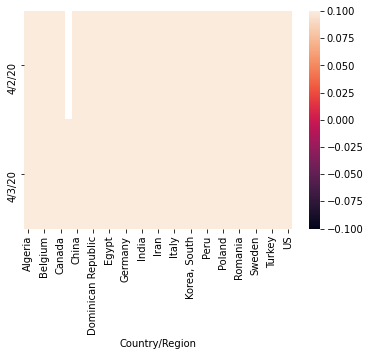

In [10]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [11]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/3/20
Country/Region,
Canada,4.824561
Philippines,3.097087
Canada,2.524590
Poland,2.444444
Greece,2.391304
Algeria,2.375000
United Kingdom,2.300917
France,2.181689
Ecuador,2.165354


In [12]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)